In [31]:
#importing libraries
import os
import pandas as pd
import seaborn as sns
import numpy as np


In [16]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [17]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Modifies the configuration of the plots we will create


#Read in the data
df= pd.read_csv(r'C:\Users\OSAEC\Desktop\Movie Recommendation\movies.csv')

In [18]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [19]:
for col in df.columns:
    perc_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, perc_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [20]:
#to insert the mean value of each column of the dataset into its rows
df.fillna(df.mean(numeric_only = True).round(1), inplace = True) #this code will only fill the numeric type column

In [21]:
#to check again to see if the rows of the missing data have been filled
#see how only the columns with numeric type data are the only ones who have been filled
for col in df.columns:
    perc_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, perc_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.002217005738132499%
runtime - 0.0%


In [28]:
count= df['rating'].value_counts()
print (count)
#from this code, i discovered that some movies were unrated and some were not rated and they both mean the same thing. so let us merge them both

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64


In [23]:
df['rating'].describe()

count     7591
unique      12
top          R
freq      3697
Name: rating, dtype: object

In [33]:
#code to rename "not rated" to "unrated"
df['rating'] = df['rating'].str.replace('Not Rated', 'Unrated')

In [34]:
#to check to see if our replacement worked
count= df['rating'].value_counts()
print (count)

R           3697
PG-13       2112
PG          1252
Unrated      335
G            153
NC-17         23
TV-MA          9
TV-PG          5
X              3
Approved       1
TV-14          1
Name: rating, dtype: int64


In [39]:
#code to fill in the missing values for in "rating, released, writer, star, country, company"
filled_rating= df['rating'].fillna(df['rating'].mode()[0], inplace = True)
filled_released = df['released'].fillna(df['released'].mode()[0], inplace = True)
filled_writer = df['writer'].fillna(df['writer'].mode()[0], inplace = True)
filled_star = df['star'].fillna(df['star'].mode()[0], inplace = True)
filled_country = df['country'].fillna(df['country'].mode()[0], inplace = True)
filled_company = df['company'].fillna(df['company'].mode()[0], inplace = True)

In [40]:
#to check if we have filled all the missing values in the dataset
for col in df.columns:
    perc_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, perc_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [44]:
df['budget']=df['budget'].astype('int64') #to change data type
df['gross']=df['gross'].astype('int64')

In [43]:
df.dtypes #to check the data types

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross       float64
company      object
runtime     float64
dtype: object

In [45]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [53]:
#it was noticed in the raw data that the "year of release" is sometimes different from the "year"
#creating correct year column
#this code takes the released column as a string, selects the first 4 digits in the released column, cuts it. 
df['Month'] = df['released'].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July


In [109]:
df['released'] = df['released'].apply(str)

In [110]:
df.dtypes

name               object
rating             object
genre              object
year                int64
released           object
score             float64
votes             float64
director           object
writer             object
star               object
country            object
budget              int64
gross               int64
company            object
runtime           float64
Month              object
corrected_year     object
dtype: object

In [106]:
df['corrected_year'] = df['released'].str.split('\(', expand = True)[0] 
#this code selects everything just before the '('

In [111]:
df['corrected_year'].astype(str).str.strip()
#converts the "corrected_year" to a string

0            June 13, 1980
1             July 2, 1980
2            June 20, 1980
3             July 2, 1980
4            July 25, 1980
5              May 9, 1980
6            June 20, 1980
7        December 19, 1980
8            June 19, 1981
9             May 16, 1980
10       December 17, 1980
11        October 26, 1984
12       December 12, 1980
13      September 19, 1980
14           July 25, 1980
15         October 3, 1980
16            May 16, 1980
17       December 19, 1980
18        February 8, 1980
19       December 12, 1980
20       February 15, 1980
21          April 24, 1981
22          August 1, 1980
23          August 8, 1980
24            June 6, 1980
25       December 25, 1980
26          March 21, 1980
27          August 1, 1980
28           June 20, 1980
29        February 1, 1980
               ...        
7638          June 7, 2019
7639         June 21, 2019
7640       October 4, 2019
7641         March 3, 2020
7642          June 7, 2019
7643     September 3, 2020
7

In [118]:
df['cor_year'] = df['corrected_year'].apply(lambda x: pd.Series({'corrected_year':x.rsplit()[-1]}))
#reverse splits "corrected_year"

In [154]:
df['cor_year'].head()

5445    29
7445    39
3045    17
6663    35
7244    38
Name: cor_year, dtype: int8

In [ ]:
#delete corrected year
del df['corrected_year']

In [122]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Month,cor_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July,1980


In [128]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [126]:
#dropping duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Month,cor_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,May,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,June,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,Dece,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,June,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,May,1980


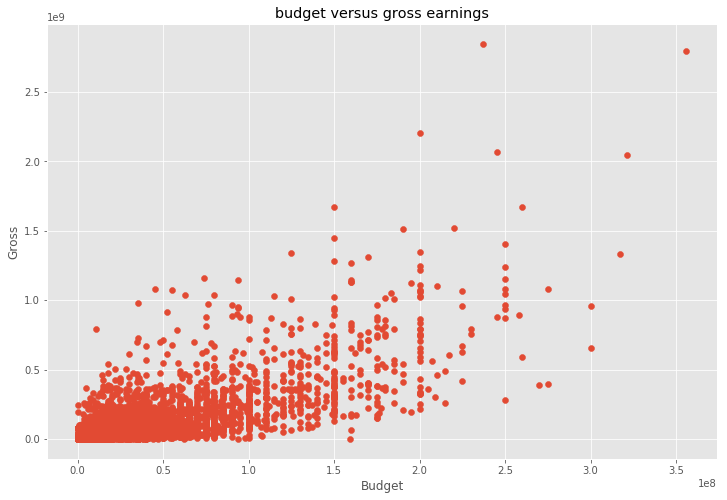

In [131]:
#The variables we think might have high correlation
#Let's do a scatter plot of budget vs gross
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('budget versus gross earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()


In [157]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Month,cor_year
5445,533,4,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,10,29
7445,535,4,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,8,39
3045,6896,4,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,10,17
6663,5144,4,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,10,35
7244,536,4,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,8,38


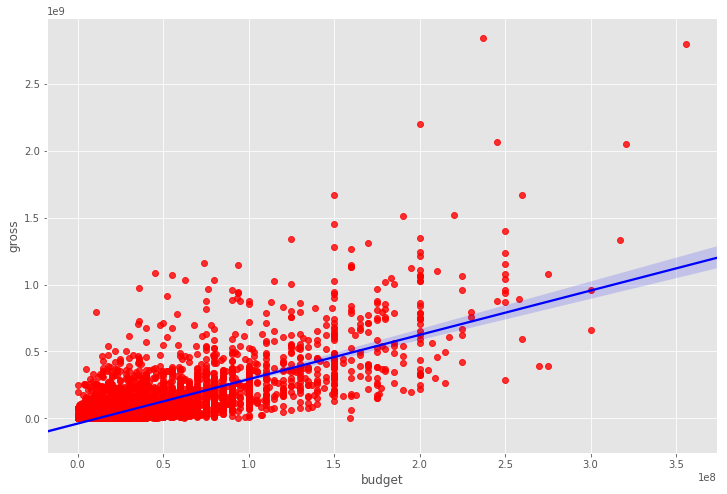

In [135]:
#Regression Plot for Budget vs Gross 
#let's check for the kind of correlation that exists
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws ={'color':'red'}, line_kws = {'color' : 'blue'})

In [136]:
#The line is moving in the upward direction, which shows positive correlation
#if the line is moving in a downward direction, the it shows negative correlation
#to check for the correlation
df.corr()
#you must note that thhe correlation will only work on numerical variables, that is why rating and other variables are not here ie they are strings
#there are different types of correlation, the one Python seaborn uses by default is the Pearson's correlation. Other correlation methods are Kendall, Spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097943,0.222810,0.265578,0.252042,0.120768
score,0.097943,1.000000,0.409182,0.064537,0.182868,0.399329
votes,0.222810,0.409182,1.000000,0.421007,0.628713,0.309166
budget,0.265578,0.064537,0.421007,1.000000,0.711270,0.265287
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241335
runtime,0.120768,0.399329,0.309166,0.265287,0.241335,1.000000


In [140]:
#using another type of correlation
#df.corr(method = 'kendall')


,year,score,votes,budget,gross,runtime
year,1.000000,0.067556,0.331581,0.144258,0.182415,0.097271
score,0.067556,1.000000,0.300059,0.003568,0.080352,0.283314
votes,0.331581,0.300059,1.000000,0.161337,0.508040,0.198199
budget,0.144258,0.003568,0.161337,1.000000,0.258476,0.161710
gross,0.182415,0.080352,0.508040,0.258476,1.000000,0.156135
runtime,0.097271,0.283314,0.198199,0.161710,0.156135,1.000000


In [141]:
#df.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.098920,0.470008,0.202558,0.267101,0.143114
score,0.098920,1.000000,0.428051,0.004787,0.117987,0.399460
votes,0.470008,0.428051,1.000000,0.234535,0.688687,0.290105
budget,0.202558,0.004787,0.234535,1.000000,0.361668,0.227859
gross,0.267101,0.117987,0.688687,0.361668,1.000000,0.227986
runtime,0.143114,0.399460,0.290105,0.227859,0.227986,1.000000


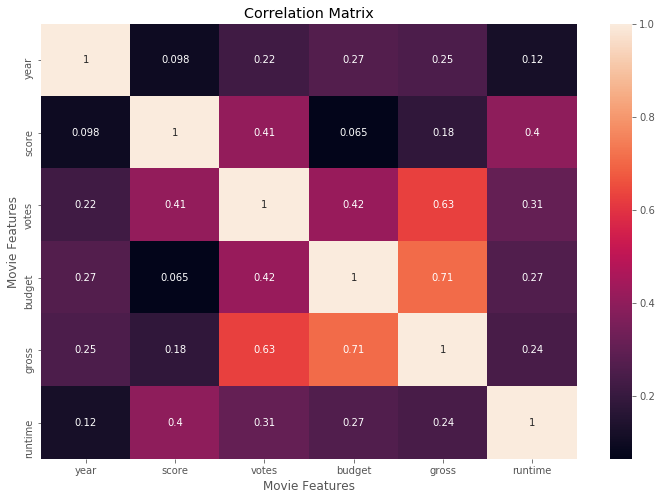

In [144]:
#There is high correlation between budget and gross
#to create a correlation matrix
corr_matrix = df.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [ ]:
#the tiles that are black show low positive correlation
#high positive correlation are being shown by the tiles that are white

In [158]:
#company
#company is not numeric, but we can code them
df_num = df
for name_col in df_num.columns:
    if (df_num[name_col].dtype == 'object'):
        df_num[name_col] = df_num[name_col].astype('category')
        df_num[name_col] = df_num[name_col].cat.codes

df_num.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Month,cor_year
5445,533,4,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,10,29
7445,535,4,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,8,39
3045,6896,4,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,10,17
6663,5144,4,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,10,35
7244,536,4,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,8,38


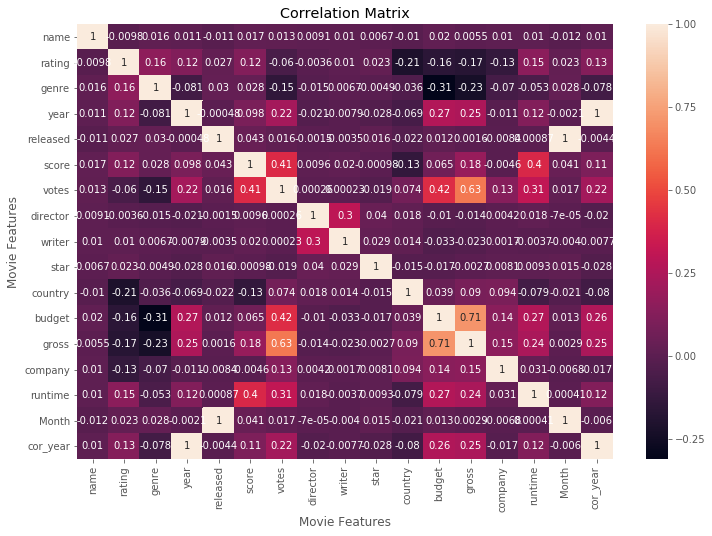

In [149]:
corr_matrix = df_num.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [150]:
#to check for only the ones with high correlation, we're going to be unstacking
Hcorr_matrix = df_num.corr()
corr_pairs = Hcorr_matrix.unstack()
corr_pairs

name      name        1.000000
          rating     -0.009813
          genre       0.016355
          year        0.011453
          released   -0.011087
          score       0.017096
          votes       0.013086
          director    0.009079
          writer      0.010018
          star        0.006749
          country    -0.010425
          budget      0.020368
          gross       0.005466
          company     0.010369
          runtime     0.010391
          Month      -0.012343
          cor_year    0.010379
rating    name       -0.009813
          rating      1.000000
          genre       0.157330
          year        0.119173
          released    0.026569
          score       0.121483
          votes      -0.059649
          director   -0.003593
          writer      0.010425
          star        0.022649
          country    -0.209895
          budget     -0.157761
          gross      -0.174820
                        ...   
Month     released    0.995317
        

In [151]:
sort_pairs = corr_pairs.sort_values()
sort_pairs

budget    genre      -0.310566
genre     budget     -0.310566
gross     genre      -0.230267
genre     gross      -0.230267
country   rating     -0.209895
rating    country    -0.209895
gross     rating     -0.174820
rating    gross      -0.174820
budget    rating     -0.157761
rating    budget     -0.157761
genre     votes      -0.145276
votes     genre      -0.145276
country   score      -0.134575
score     country    -0.134575
company   rating     -0.129015
rating    company    -0.129015
year      genre      -0.081261
genre     year       -0.081261
cor_year  country    -0.080221
country   cor_year   -0.080221
          runtime    -0.079265
runtime   country    -0.079265
cor_year  genre      -0.078120
genre     cor_year   -0.078120
          company    -0.070013
company   genre      -0.070013
year      country    -0.069423
country   year       -0.069423
rating    votes      -0.059649
votes     rating     -0.059649
                        ...   
runtime   score       0.399329
votes   

In [153]:
high_corr = sort_pairs[(sort_pairs) > 0.5]
high_corr

gross     votes       0.628713
votes     gross       0.628713
budget    gross       0.711270
gross     budget      0.711270
released  Month       0.995317
Month     released    0.995317
cor_year  year        0.996802
year      cor_year    0.996802
name      name        1.000000
writer    writer      1.000000
runtime   runtime     1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
Month     Month       1.000000
cor_year  cor_year    1.000000
dtype: float64

In [ ]:
#it is noticed that "votes" and "Budget" have high corr with "Gross", and "Company" does not.